# Hello everyone. I am Shreenidhi Hipparagi, Data Science and Business Analytics Intern, The Spark Foundations 
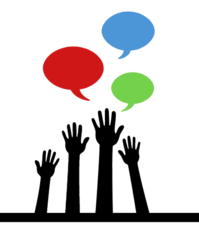

## The Task 1 

# Predict the percentage scored by a student based on number of study hours

## 1) We will be using simple linear regression to this Task as it involves just two variables (hours and score)
## 2) The Metric we will be using is Root Mean Squared Error and Mean Absolute Error

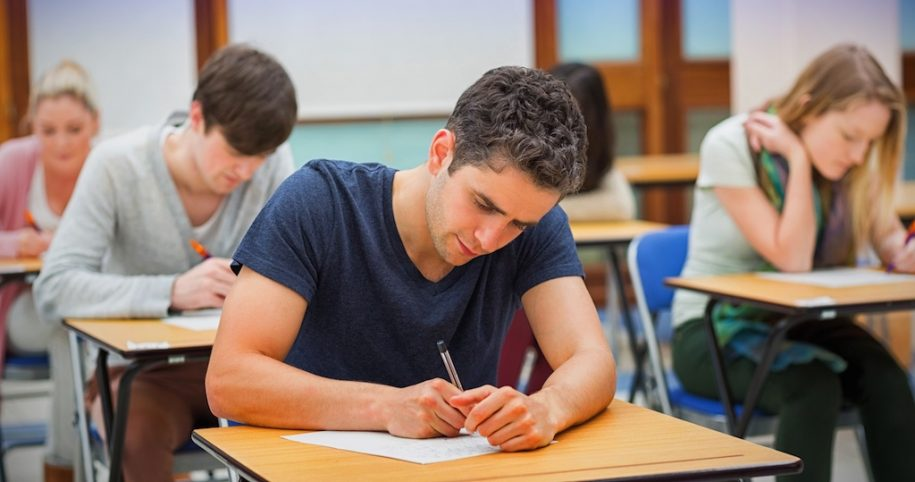

## So let's begin this task by importing the Libraries required 

In [1]:
import numpy as np # for numerical computation 
import pandas as pd # for data manipulation and importing dataset
import seaborn as sns # for visualization 
import matplotlib.pyplot as plt

F:\python\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
F:\python\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
F:\python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_path="http://bit.ly/w-data"
data=pd.read_csv(data_path)
print("The dataset is imported successfully")
data.head(10)

The dataset is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# We can observe the 10 rows of data with two attribute Hours and Scores 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# The above line suggest us that there are total of 25 entries in the dataset. The dataset is small 

## Lets check the summary or lets describe the data

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Some important points from above line of code

1) Average study hour is 5.01 
2) Avearge Score is 51.48
3) Minimum study hour is 1.10 and Maximum study hour is 9.2
4) Minimum score is 17 and Maximum score is 95

# Basically we can see the five number summary, five number summary describes the center, shape and spread of the data


# Let us visualize the data using seaborn 

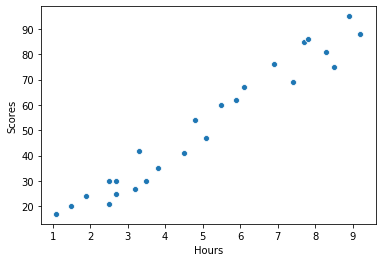

In [5]:
sns.scatterplot(x='Hours',y='Scores',data=data)


# Observing the graph we can say that as the study hour increases the scores are increasing 

In [6]:
#range of scores
Range= data['Scores'].max()- data['Scores'].min()
print("The range of scores is:{}".format(Range))

The range of scores is:78


# Lets split the data into train and test set 

In [7]:
from sklearn.model_selection import train_test_split
x=data['Hours'] #independent variable 
y=data['Scores'] #dependent or target variable
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)

# The dataset is divided into 30% test data and 80% train data 

In [8]:
xtrain.head()

12    4.5
0     2.5
23    6.9
6     9.2
20    2.7
Name: Hours, dtype: float64

In [9]:
xtest.head()

1     5.1
5     1.5
11    5.9
13    3.3
2     3.2
Name: Hours, dtype: float64

# lets build the model using sklearn and linear regression

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() #model object
lr.fit(xtrain.values.reshape(-1,1),ytrain) #training the model 
print("The training is complete")

The training is complete


In [11]:
ypred=lr.predict(xtest.values.reshape(-1,1))
print("Predicted on the test set")

Predicted on the test set


# Lets use metrics for model valuation 

In [12]:
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(ypred,ytest))

4.864179014718323

In [13]:
from sklearn.metrics import mean_absolute_error as mae
mae(ypred,ytest)

4.556137724550894

The original regression plot on xtest and ytest


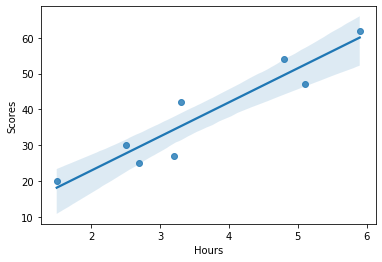

In [14]:
sns.regplot(x=xtest,y=ytest)
print("The original regression plot on xtest and ytest")

The predicted regression plot


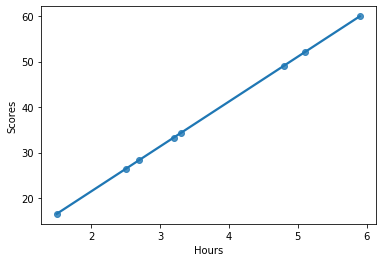

In [15]:
sns.regplot(x=xtest,y=ypred)
plt.ylabel("Scores")
print("The predicted regression plot")

# The task given to us is to find out the Score on a single prediction when  the student sits to study for 9.25 hours per day 

In [16]:
x_new=[[9.25]]
yfinal=lr.predict(x_new)

In [17]:
print("The student can score: {}".format(yfinal))

The student can score: [93.04378743]


# According to our model, the student can score 93